In [38]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [28]:
from konlpy.tag import Okt

okt = Okt()
okt

In [29]:
from shlex import join


token = okt.morphs("꿈의 거처")
print(token)

sentence_tag = okt.pos("달이 참 예쁘다고")
print(sentence_tag)

sentence_tag = okt.pos("달이 참 예쁘다고", join=True)
print(sentence_tag)
sentence_tag = okt.phrases("달이 참 예쁘다고")
print(sentence_tag)

['꿈', '의', '거처']
[('달이', 'Noun'), ('참', 'Verb'), ('예쁘다고', 'Adjective')]
['달이/Noun', '참/Verb', '예쁘다고/Adjective']
['달이']


In [30]:
text = input()
sentence_tag = okt.pos(text)
print(sentence_tag)

[('s', 'Alpha')]


In [31]:
# collection.counter()로 빈도수 구하기
import collections

text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Nisl tincidunt eget nullam non. Quis hendrerit dolor magna eget est lorem ipsum dolor sit. Volutpat odio facilisis mauris sit amet massa. Commodo odio aenean sed adipiscing diam donec adipiscing tristique. Mi eget mauris pharetra et. Non tellus orci ac auctor augue. Elit at imperdiet dui accumsan sit. Ornare arcu dui vivamus arcu felis. Egestas integer eget aliquet nibh praesent. In hac habitasse platea dictumst quisque sagittis purus. Pulvinar elementum integer enim neque volutpat ac.Senectus et netus et malesuada. Nunc pulvinar sapien et ligula ullamcorper malesuada proin. Neque convallis a cras semper auctor. Libero id faucibus nisl tincidunt eget. Leo a diam sollicitudin tempor id. A lacus vestibulum sed arcu non odio euismod lacinia. In tellus integer feugiat scelerisque. Feugiat in fermentum posuere urna nec tincidunt praesent. Porttitor rhoncus dolor purus non enim praesent elementum facilisis. Nisi scelerisque eu ultrices vitae auctor eu augue ut lectus. Ipsum faucibus vitae aliquet nec ullamcorper sit amet risus. Et malesuada fames ac turpis egestas sed. Sit amet nisl suscipit adipiscing bibendum est ultricies. Arcu ac tortor dignissim convallis aenean et tortor at. Pretium viverra suspendisse potenti nullam ac tortor vitae purus. Eros donec ac odio tempor orci dapibus ultrices. Elementum nibh tellus molestie nunc. Et magnis dis parturient montes nascetur. Est placerat in egestas erat imperdiet. Consequat interdum varius sit amet mattis vulputate enim.Sit amet nulla facilisi morbi tempus. Nulla facilisi cras fermentum odio eu. Etiam erat velit scelerisque in dictum non consectetur a erat. Enim nulla aliquet porttitor lacus luctus accumsan tortor posuere. Ut sem nulla pharetra diam. Fames ac turpis egestas maecenas. Bibendum neque egestas congue quisque egestas diam. Laoreet id donec ultrices tincidunt arcu non sodales neque. Eget felis eget nunc lobortis mattis aliquam faucibus purus. Faucibus interdum posuere lorem ipsum dolor sit."
sentence_tag = okt.pos(text)

adj_list = []
for word, tag in sentence_tag:
    if tag in ["Alpha", "Adjective"]:  # 품사 중에서 명사, 형용사인 것만 추출
        adj_list.append(word)

counts = collections.Counter(adj_list)
tag = counts.most_common(10)
print(tag)

[('sit', 7), ('ac', 7), ('amet', 6), ('et', 6), ('eget', 6), ('dolor', 5), ('non', 5), ('odio', 5), ('egestas', 5), ('adipiscing', 4)]


In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
# 워드클라우드
font_path = "C:/Windows/Fonts/gulim.ttc"

# text 가져오기
text = "아무 노래나 일단 틀어"
sentence_tag = okt.pos(text)
adj_list = []

for word, tag in sentence_tag:
    if tag in ["Noun", "Adjective"]:
        adj_list.append(word)

adj_list

['아무', '노래', '일단']

In [34]:
counts = collections.Counter(adj_list)
tag = counts.most_common(10)
tag

[('아무', 1), ('노래', 1), ('일단', 1)]

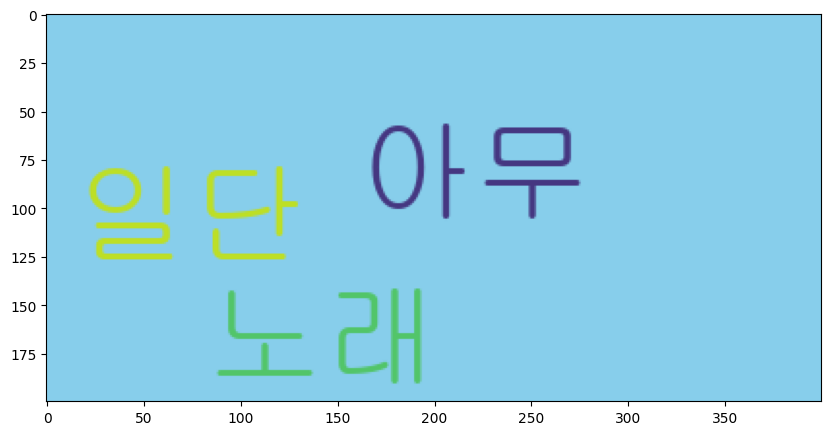

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path=font_path, background_color="skyblue", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10, 8))
plt.imshow(cloud)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
from konlpy.tag import Okt

okt = Okt()
df = pd.read_table("../resources/12장/ratings_train.txt")
df.head(4)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0


In [37]:
print(df["id"].nunique())
print(df.isnull().sum())

150000
id          0
document    5
label       0
dtype: int64


In [38]:
df = df.dropna(how="any")
print(df.isnull().values.any())
print(df.isnull().sum())

False
id          0
document    0
label       0
dtype: int64


In [39]:
df["document"] = df["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [42]:
temp_list = []
for sentence in df["document"]:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ["Noun", "Adjective"]:
            temp_list.append(word)

counts = collections.Counter(temp_list)  # 동일한 값의 빈도수
tag = counts.most_common(50)  # 가장 빈도 수가 많은 순서대로 n개 추출
tag

[('영화', 50643),
 ('정말', 9578),
 ('진짜', 8338),
 ('점', 7636),
 ('이', 7476),
 ('연기', 6328),
 ('평점', 6315),
 ('것', 6302),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('왜', 5124),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('말', 4552),
 ('더', 4355),
 ('배우', 4291),
 ('때', 4279),
 ('내', 4133),
 ('감독', 4118),
 ('거', 4085),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('뭐', 3775),
 ('그냥', 3758),
 ('좀', 3648),
 ('그', 3587),
 ('이런', 3574),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('수', 3240),
 ('작품', 2980),
 ('사랑', 2943),
 ('나', 2898),
 ('없다', 2834),
 ('하나', 2818),
 ('다시', 2816),
 ('볼', 2785),
 ('마지막', 2757),
 ('좋은', 2663),
 ('이건', 2605),
 ('정도', 2586),
 ('같은', 2554),
 ('완전', 2540),
 ('입니다', 2532),
 ('있는', 2510),
 ('처음', 2453)]

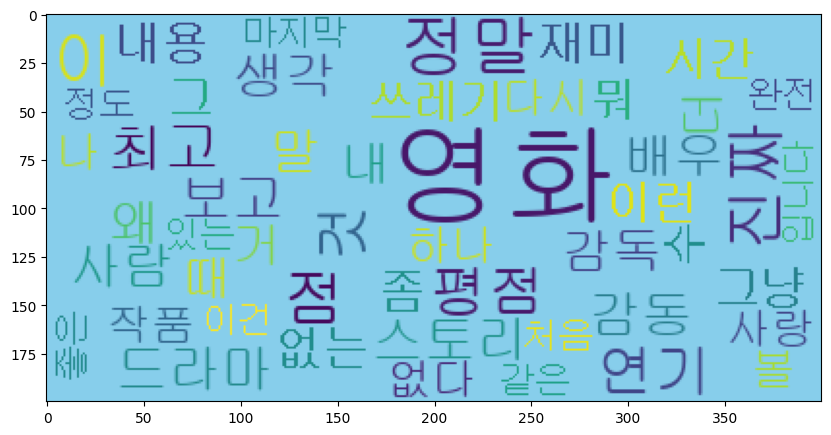

In [44]:
wc = WordCloud(font_path=font_path, background_color="skyblue", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10, 8))
plt.imshow(cloud)

In [47]:
stopword = [
    "점",
    "정말",
    "왜",
    "말",
    "그",
    "없다",
    "정도",
    "걸",
    "뭐",
    "이건",
    "영화",
    "완전",
    "좀",
    "있는",
    "거",
    "나",
    "이",
    "볼",
    "입니다",
    "것",
    "이런",
    "더",
    "수",
    "때",
]
temp_list = []
for sentence in df["document"]:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if word not in stopword:
            if tag in ["Noun", "Adjective"]:
                temp_list.append(word)

counts = collections.Counter(temp_list)  # 동일한 값의 빈도수
tag = counts.most_common(50)  # 가장 빈도 수가 많은 순서대로 n개 추출
tag

[('영화', 50643),
 ('정말', 9578),
 ('진짜', 8338),
 ('점', 7636),
 ('이', 7476),
 ('연기', 6328),
 ('평점', 6315),
 ('것', 6302),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('왜', 5124),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('말', 4552),
 ('더', 4355),
 ('배우', 4291),
 ('때', 4279),
 ('내', 4133),
 ('감독', 4118),
 ('거', 4085),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('뭐', 3775),
 ('그냥', 3758),
 ('좀', 3648),
 ('그', 3587),
 ('이런', 3574),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('수', 3240),
 ('작품', 2980),
 ('사랑', 2943),
 ('나', 2898),
 ('없다', 2834),
 ('하나', 2818),
 ('다시', 2816),
 ('볼', 2785),
 ('마지막', 2757),
 ('좋은', 2663),
 ('이건', 2605),
 ('정도', 2586),
 ('같은', 2554),
 ('완전', 2540),
 ('입니다', 2532),
 ('있는', 2510),
 ('처음', 2453)]

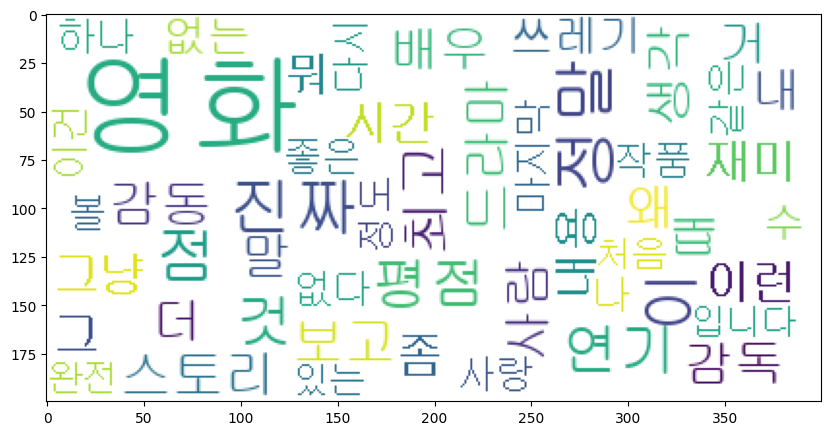

In [49]:
wc = WordCloud(font_path=font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10, 8))
plt.imshow(cloud)

In [43]:
dict_df = pd.read_csv("../resources/12장/comment_rank.csv")
dict_df.head()

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [48]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [64]:
dict_df['movie'].unique() # 중복을 제거한 개수 확인

array(['언포기버블', '인질', '롱 리브 더 킹: 목포 영웅', '싱크홀', '아수라', '고양이 집사', '비바리움',
       '어메이징 스파이더맨', '미드소마', '서복', '매트릭스'], dtype=object)

In [51]:
# 영화별 평점
dict_df.groupby(['movie'])['rank'].mean()

movie
고양이 집사              8.678947
롱 리브 더 킹: 목포 영웅    10.000000
매트릭스               10.000000
미드소마                9.285714
비바리움                9.095238
서복                  9.319149
싱크홀                 9.838384
아수라                 9.616162
어메이징 스파이더맨          9.711538
언포기버블               7.535354
인질                  9.534884
Name: rank, dtype: float64

In [52]:
# 영화별 리뷰 수
dict_df.groupby('movie')['comment'].count()

movie
고양이 집사             190
롱 리브 더 킹: 목포 영웅      0
매트릭스                 8
미드소마                84
비바리움                84
서복                  47
싱크홀                 99
아수라                 99
어메이징 스파이더맨          52
언포기버블               99
인질                 129
Name: comment, dtype: int64

In [53]:
# 고양이 집사 데이터만 추출하기
okt = Okt()

cat_df = dict_df[dict_df.movie == "고양이 집사"]
cat_df

,Unnamed: 0,movie,comment,rank
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
6,6,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
15,15,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
16,16,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
25,25,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
949,949,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
959,959,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
969,969,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
979,979,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9


In [55]:
# 리뷰 분석
temp_list = []
for sentence in cat_df["comment"]:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ["Noun", "Adjective"]:
            temp_list.append(word)

counts = collections.Counter(temp_list)  # 동일한 값의 빈도수
tag = counts.most_common(50)  # 가장 빈도 수가 많은 순서대로 n개 추출
tag

[('아이', 198),
 ('감동', 190),
 ('사람', 190),
 ('방금', 99),
 ('깊게', 99),
 ('우리나라', 99),
 ('독일', 99),
 ('동물보호법', 99),
 ('강화', 99),
 ('더', 99),
 ('이상', 99),
 ('없기를', 99),
 ('길위', 99),
 ('모두', 99),
 ('손길', 99),
 ('행복하기를', 99),
 ('영화', 99),
 ('세상', 99),
 ('듯', 99),
 ('좋', 99),
 ('은', 99),
 ('계시다면', 99),
 ('얼마나', 99),
 ('좋을까요', 99),
 ('출연', 99),
 ('냥', 99),
 ('모든', 99),
 ('복', 99),
 ('행복하세요', 99),
 ('덕분', 99),
 ('마음', 99),
 ('사랑스런', 91),
 ('고양이', 91),
 ('따뜻한', 91),
 ('이야기', 91),
 ('만', 91)]

In [57]:
# 딕셔너리 변환환

tag_dic = {}
for k, v in tag:
    tag_dic[k] = v

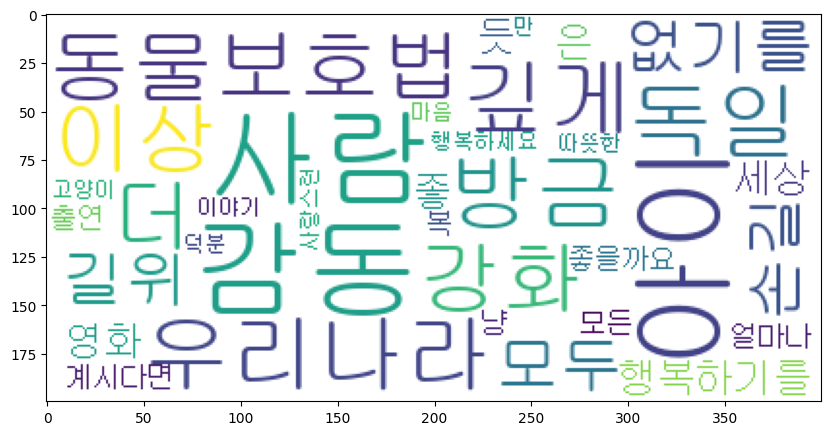

In [61]:
# 위드클라우드 시각화

wc = WordCloud(font_path=font_path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(tag_dic)

plt.figure(figsize=(10, 8))
plt.imshow(cloud)